In [1]:
from models import *
from util import show
from optimize.util import *
import regression

In [2]:
N = 21
start = [0.5, 1, 4]

x = np.linspace(0, 5, N)
y = np.exp(x)

In [3]:
func, jac = funcs["sin2"]

test = optimize(func, jac, regression.regression, method='GAUSS-NEWTON')
betta = test(x, y, start)

X = np.linspace(0, 5, N)
Y = func(X)(betta)

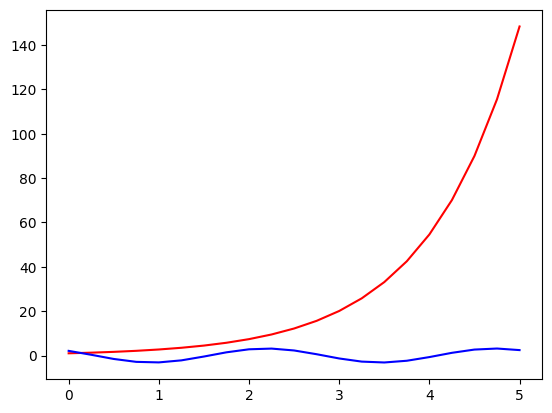

In [4]:
show(x, y, X, Y)

array([-1.        ,  1.        ,  9.42477796])

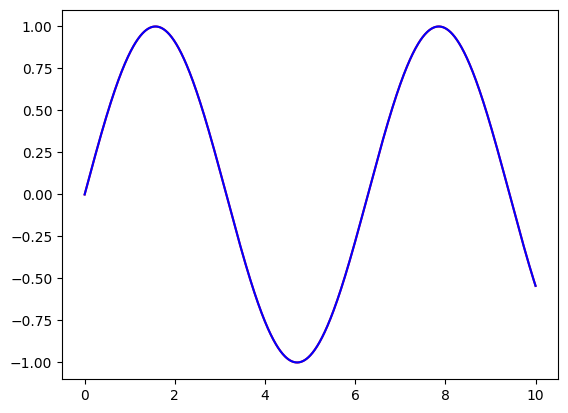

In [5]:
degree = 5
count = 10
steps = 1000
(test_x, test_y) = example.generate_test(np.sin, 0, count, steps)



betta = test(test_x, test_y, start, eps=1e-5, max_iter=1000)

X = np.linspace(0, count, steps)
Y = func(X)(betta)

show(test_x, test_y, X, Y)
betta

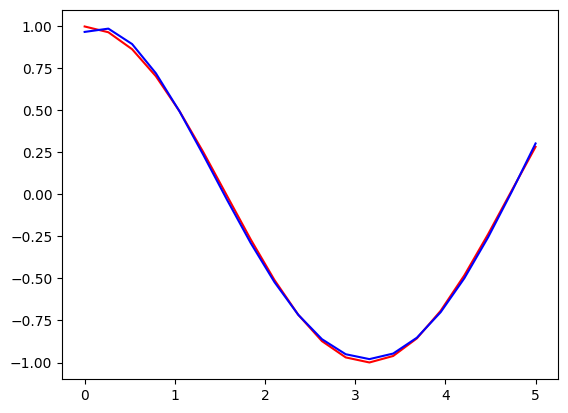

In [6]:
import tests as tests

input = tests.create_tests()

interest = 21
iter = 0
for test in input:
    if iter != interest:
        iter += 1
        continue
    
    func, jac = test.model
    task = optimize(func, jac, regression.regression, method='GAUSS-NEWTON')
    
    betta = task(test.X, test.Y, test.init_point, 1e-4, 10000)
    
    X = np.linspace(test.begin, test.end, test.steps)
    Y = func(X)(betta)
    
    example.show(test.X, test.Y, X, Y)
    
    iter += 1